<a href="https://colab.research.google.com/github/Ayeshanadaf796/Nykaa-brands-and-products-analysis/blob/main/Nykaa_Brands_and_Products_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/Nykaa Cosmetics Data.csv')

In [ ]:
data.head()

,Brand_Name,Product_ID,in_stock,MRP,Price,product_title,rating,rating_count,tags,listing_page_name
0,Herbal Essences,2659739,True,1250,750,Herbal Essences Argan Oil Of Moroccan Shampoo ...,4.4,1008,"FEATURED, BESTSELLER",Herbal Essences
1,Herbal Essences,1290145,True,1575,1181,Herbal Essences Aloe & Bamboo Shampoo + Condit...,4.4,1034,FEATURED,Herbal Essences
2,Herbal Essences,456559,True,1250,688,Herbal Essences Argan Oil Shampoo & Conditione...,4.3,10879,"FEATURED, BESTSELLER",Herbal Essences
3,Herbal Essences,3753166,True,1575,945,Herbal Essences Aloe & Bamboo Shampoo + Condit...,4.3,65,FEATURED,Herbal Essences
4,Herbal Essences,5360837,True,600,390,Herbal Essences Argan Oil Of Morocco Shampoo -...,4.3,8769,"FEATURED, BESTSELLER",Herbal Essences


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand_Name         3663 non-null   object 
 1   Product_ID         3663 non-null   int64  
 2   in_stock           3663 non-null   bool   
 3   MRP                3663 non-null   int64  
 4   Price              3663 non-null   int64  
 5   product_title      3663 non-null   object 
 6   rating             3663 non-null   float64
 7   rating_count       3663 non-null   int64  
 8   tags               305 non-null    object 
 9   listing_page_name  3663 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 261.3+ KB


In [ ]:
data.describe()

,Product_ID,MRP,Price,rating,rating_count
count,3.663000e+03,3663.000000,3663.000000,3663.000000,3663.000000
mean,1.945670e+06,757.762217,613.470925,4.284848,7239.644554
std,2.171661e+06,692.147866,590.075849,0.567004,18498.625476
min,2.500000e+02,50.000000,41.000000,0.000000,0.000000
25%,3.331645e+05,275.000000,220.000000,4.200000,114.000000
50%,8.565000e+05,578.000000,446.000000,4.400000,781.000000
75%,3.597392e+06,950.000000,763.000000,4.500000,5423.500000
max,7.889173e+06,5375.000000,5375.000000,5.000000,180065.000000


**1.** **BRAND LEVEL ANALYSIS**

**Brands by Popularity**

In [ ]:
popular_brands = data.groupby('Brand_Name')['rating_count'].sum().sort_values(ascending=False)

In [ ]:
print(popular_brands)

Brand_Name
Nykaa Cosmetics                14644460
Nykaa Naturals                  3894393
Biotique                        1913039
Maybelline New York             1372320
Lakme                           1212519
Faces Canada                     676894
Kay Beauty                       467201
L'Oreal Paris                    415694
Colorbar                         405572
Neutrogena                       337996
Lotus Herbals                    328589
Nivea                            326118
Olay                             135741
The Face Shop                    128124
NYX Professional Makeup           93677
Herbal Essences                   84794
Huda Beauty                       39357
Beauty Award Winners              17373
Aveeno                            14572
Veet                               5166
Wanderlust                         3602
Moi                                1225
Kayali                              169
NYX Professional Makeup Pro         166
Ikkai by Lotus Herbals       

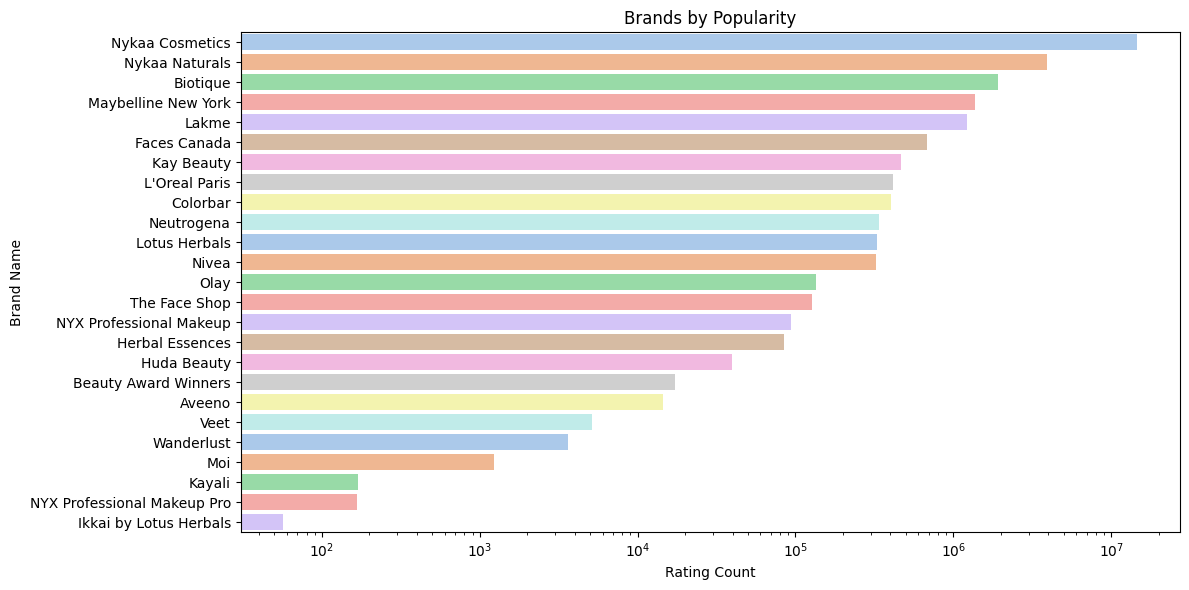

In [ ]:
plt.figure(figsize=[12,6])
sns.barplot(x=popular_brands.values, y=popular_brands.index, palette='pastel')
plt.title('Brands by Popularity')
plt.xlabel('Rating Count')
plt.ylabel('Brand Name')
plt.xscale('log')
plt.tight_layout()
plt.show()


**Number of Products per Brand**

In [ ]:
product_count = data.groupby('Brand_Name')['product_title'].count().reset_index()
product_count.rename(columns={'product_title':'product_count'}, inplace=True)
product_count = product_count.sort_values(by='product_count', ascending=False)


In [ ]:
print(product_count)

                     Brand_Name  product_count
19              Nykaa Cosmetics            812
20               Nykaa Naturals            441
2                      Biotique            370
11                        Lakme            242
3                      Colorbar            230
12                Lotus Herbals            215
4                  Faces Canada            197
10                L'Oreal Paris            192
8                    Kay Beauty            168
18                        Nivea            165
13          Maybelline New York            164
21                         Olay            120
6                   Huda Beauty            103
22                The Face Shop             77
17                   Neutrogena             56
15      NYX Professional Makeup             53
5               Herbal Essences             28
24                   Wanderlust             16
16  NYX Professional Makeup Pro              3
0                        Aveeno              3
1          Be

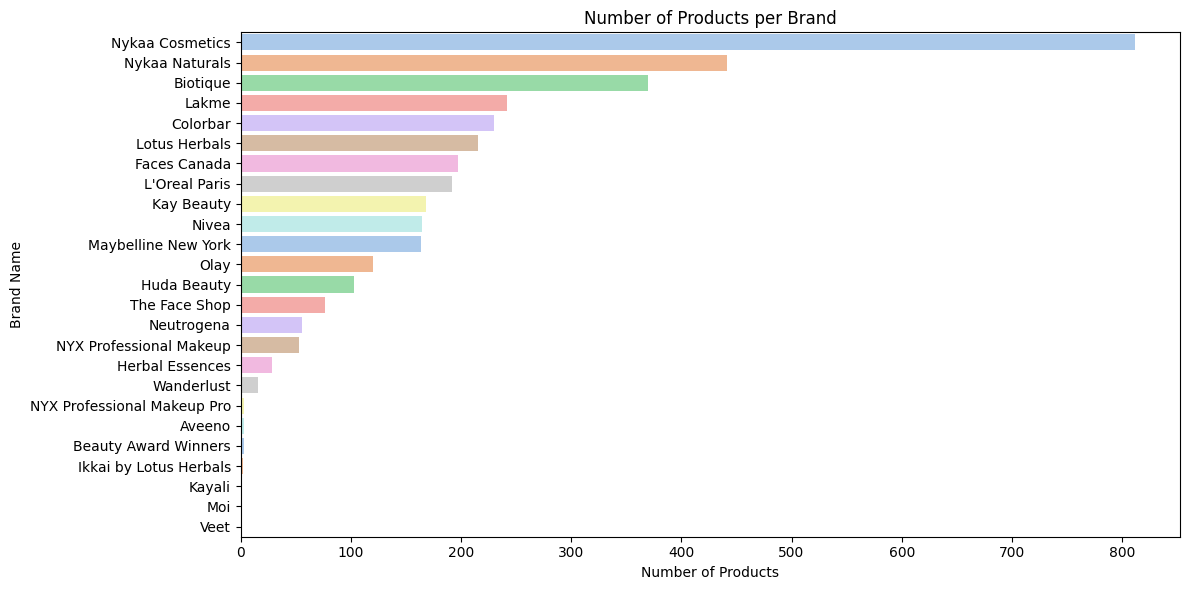

In [ ]:
plt.figure(figsize=[12,6])
sns.barplot(x='product_count', y='Brand_Name', data=product_count, palette='pastel')
plt.title('Number of Products per Brand')
plt.xlabel('Number of Products')
plt.ylabel('Brand Name')
plt.tight_layout()
plt.show()


**Average Price and MRP per brand**

In [ ]:
brand_price = data.groupby('Brand_Name')[['Price','MRP']].mean().reset_index()
brand_price = brand_price.sort_values(by='Price',ascending=False)
print(brand_price.head(10))

                     Brand_Name        Price          MRP
9                        Kayali  2450.000000  2450.000000
6                   Huda Beauty  2395.330097  2404.650485
16  NYX Professional Makeup Pro  1632.333333  1832.333333
21                         Olay  1416.308333  1771.675000
8                    Kay Beauty  1059.928571  1251.392857
22                The Face Shop  1055.363636  1179.506494
15      NYX Professional Makeup  1054.603774  1343.320755
0                        Aveeno  1024.333333  1256.666667
17                   Neutrogena   904.732143  1131.482143
14                          Moi   900.000000  1800.000000


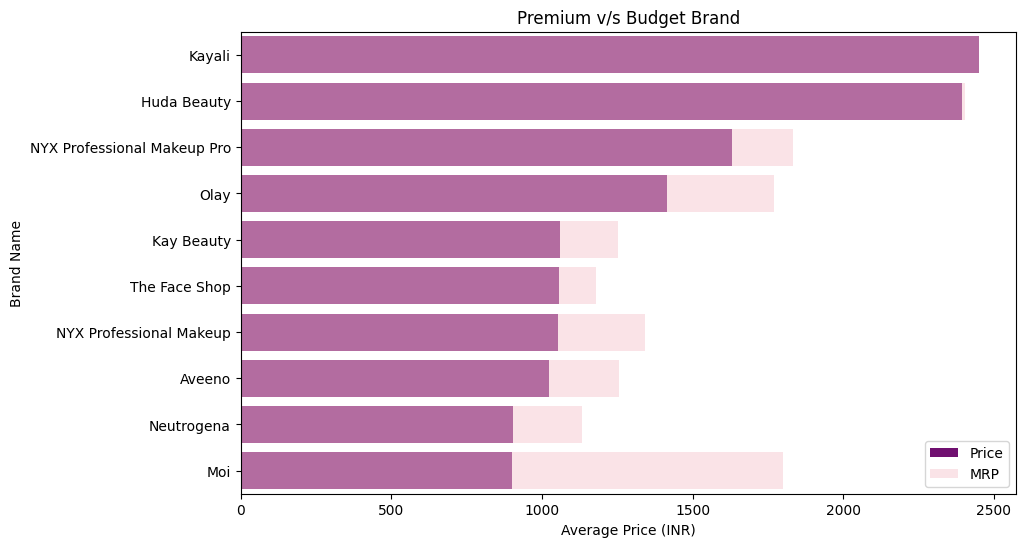

In [ ]:
plt.figure(figsize=[10,6])
sns.barplot(
    x='Price',
    y='Brand_Name',
    data=brand_price.head(10),
    color='purple',
    label='Price'
)
sns.barplot(
    x='MRP',
    y='Brand_Name',
    data=brand_price.head(10),
    color='pink',
    alpha=0.5,
    label='MRP'
)
plt.title('Premium v/s Budget Brand')
plt.xlabel('Average Price (INR)')
plt.ylabel('Brand Name')
plt.legend()
plt.show()


**Average rating and total rating count per brand**

In [ ]:
brand_rating = data.groupby('Brand_Name')[['rating','rating_count']].mean().reset_index()
brand_rating = brand_rating.sort_values(by='rating', ascending=False)
print(brand_rating.head(10))

                     Brand_Name    rating  rating_count
7        Ikkai by Lotus Herbals  4.750000     28.500000
16  NYX Professional Makeup Pro  4.600000     55.333333
9                        Kayali  4.500000    169.000000
24                   Wanderlust  4.493750    225.125000
8                    Kay Beauty  4.473214   2780.958333
18                        Nivea  4.455758   1976.472727
21                         Olay  4.386667   1131.175000
10                L'Oreal Paris  4.381250   2165.072917
17                   Neutrogena  4.371429   6035.642857
0                        Aveeno  4.366667   4857.333333


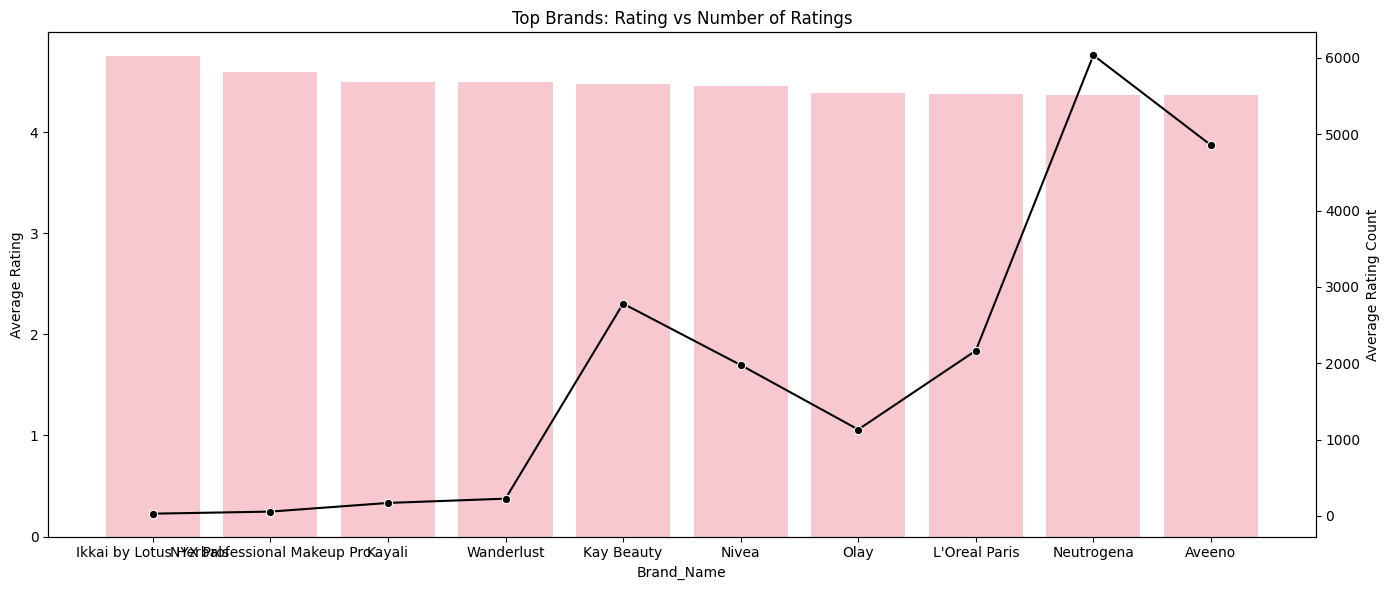

In [ ]:
fig, ax1 = plt.subplots(figsize=(14,6))

ax2 = ax1.twinx()
sns.barplot(x='Brand_Name', y='rating', data=brand_rating.head(10), ax=ax1, color='pink')
sns.lineplot(x='Brand_Name', y='rating_count', data=brand_rating.head(10), ax=ax2, color='black', marker='o')

ax1.set_ylabel('Average Rating')
ax2.set_ylabel('Average Rating Count')
plt.title('Top Brands: Rating vs Number of Ratings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**2. PRODUCT LEVEL ANALYSIS**

**Top 10 Products by MRP**

In [ ]:
top10_MRP = data[['Brand_Name','product_title','MRP']].sort_values(by='MRP',ascending=False).head(10)
top10_MRP

,Brand_Name,product_title,MRP
2228,Huda Beauty,Huda Beauty Rose Gold Palette - Remastered,5375
2235,Huda Beauty,Huda Beauty Desert Dusk Eyeshadow Palette,5375
2223,Huda Beauty,Huda Beauty Empowered Eyeshadow Palette,5375
2161,Huda Beauty,Huda Beauty The New Nude Eyeshadow Palette,5375
2160,Huda Beauty,Huda Beauty Naughty Nude Eyeshadow Palette,5375
2168,Huda Beauty,Huda Beauty Rose Quartz Eyeshadow Palette,5375
2166,Huda Beauty,Huda Beauty Mercury Retrograde Eyeshadow Palet...,5375
72,Kay Beauty,Kay Beauty Bridal Look -Blush+Highlighter+Eyes...,5094
792,NYX Professional Makeup,NYX Professional Makeup Ultimate Queen Shadow ...,5000
243,Olay,Olay Regenerist Complete Skincare (Day/Night M...,4797


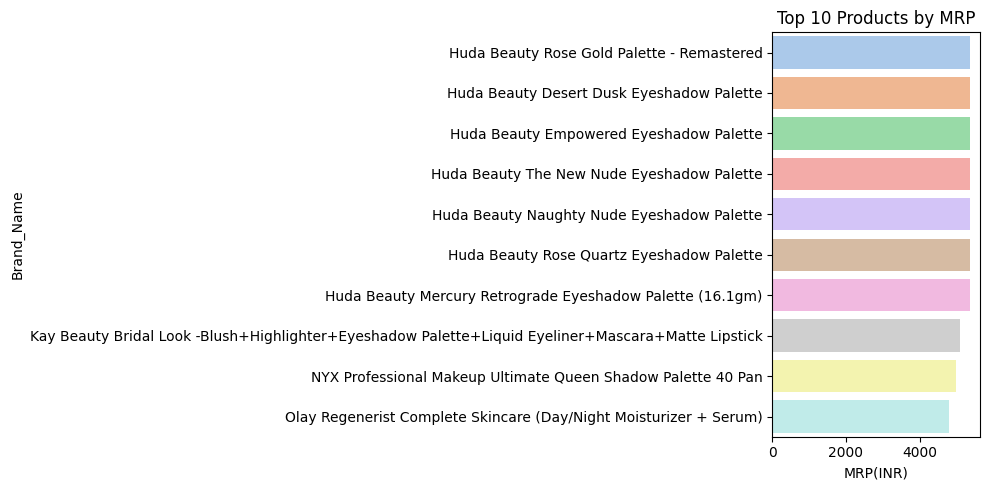

In [ ]:
plt.figure(figsize=[10,5])
sns.barplot(x='MRP', y='product_title', data=top10_MRP,palette='pastel')
plt.title('Top 10 Products by MRP')
plt.xlabel('MRP(INR)')
plt.ylabel('Brand_Name')
plt.tight_layout()
plt.show()

**Top 10 Products by Price**

In [ ]:
top10_price = data[['Brand_Name','product_title','Price']].sort_values(by='Price',ascending=False).head(10)

In [ ]:
top10_price

,Brand_Name,product_title,Price
2235,Huda Beauty,Huda Beauty Desert Dusk Eyeshadow Palette,5375
2228,Huda Beauty,Huda Beauty Rose Gold Palette - Remastered,5375
2168,Huda Beauty,Huda Beauty Rose Quartz Eyeshadow Palette,5375
2166,Huda Beauty,Huda Beauty Mercury Retrograde Eyeshadow Palet...,5375
2160,Huda Beauty,Huda Beauty Naughty Nude Eyeshadow Palette,5375
2161,Huda Beauty,Huda Beauty The New Nude Eyeshadow Palette,5375
2223,Huda Beauty,Huda Beauty Empowered Eyeshadow Palette,5375
72,Kay Beauty,Kay Beauty Bridal Look -Blush+Highlighter+Eyes...,4075
2147,Huda Beauty,Huda Beauty Festive Obsessions Set,3800
2248,Huda Beauty,Huda Beauty 3D Cream and Powder Highlighter Pa...,3600


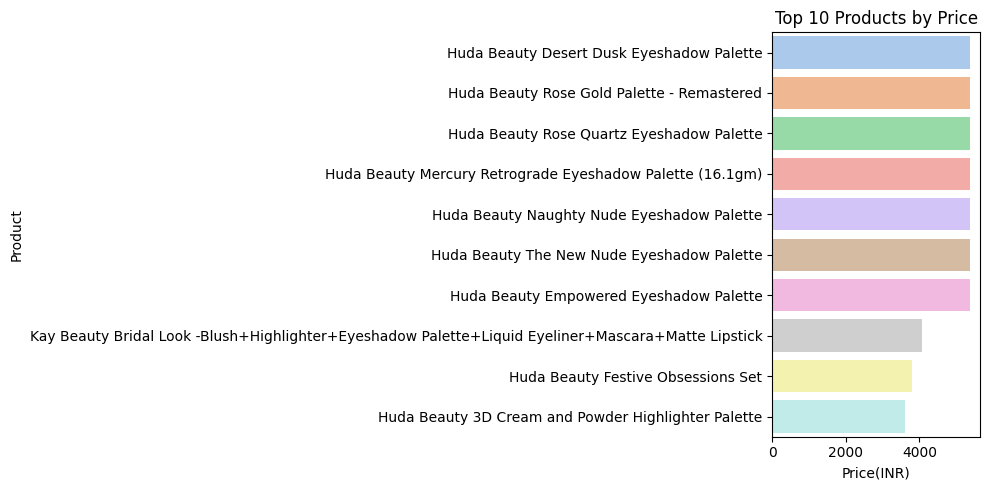

In [ ]:
plt.figure(figsize=[10,5])
sns.barplot(x='Price', y='product_title', data=top10_price, palette='pastel')
plt.title('Top 10 Products by Price')
plt.xlabel('Price(INR)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

**3. STOCK ANALYSIS**

**Products in-stock v/s out of stock**

In [ ]:
stock_count = data['in_stock'].value_counts()
print(stock_count)

in_stock
True     3363
False     300
Name: count, dtype: int64


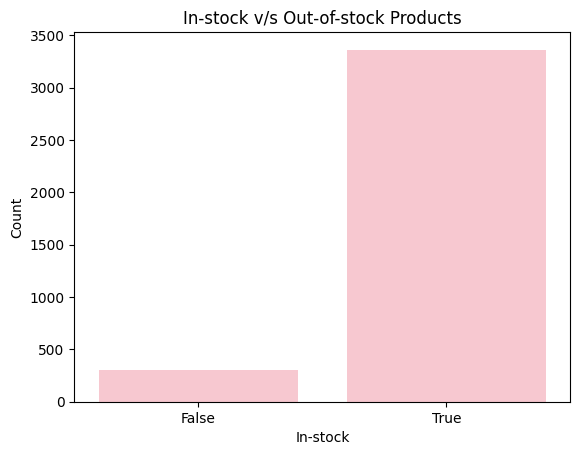

In [ ]:
sns.countplot(x='in_stock', data=data,color='pink')
plt.title('In-stock v/s Out-of-stock Products')
plt.xlabel('In-stock')
plt.ylabel('Count')
plt.show()

**Brands with most out-of-stock products**

In [ ]:
out_of_stock = data[data['in_stock']==0].groupby('Brand_Name')['product_title'].count().reset_index()
out_of_stock.rename(columns={'product_title':'out_of_stock_count'}, inplace=True)
out_of_stock = out_of_stock.sort_values(by='out_of_stock_count', ascending=False)
print(out_of_stock.head(10))


         Brand_Name  out_of_stock_count
1          Biotique                  80
10    Lotus Herbals                  32
3      Faces Canada                  26
9             Lakme                  24
5       Huda Beauty                  24
15  Nykaa Cosmetics                  22
14            Nivea                  18
18    The Face Shop                  13
17             Olay                  13
8     L'Oreal Paris                  12


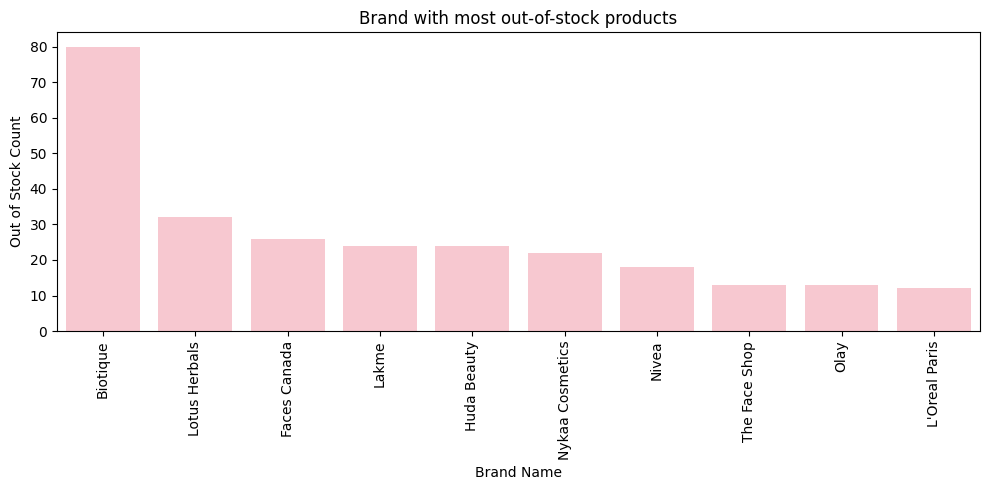

In [ ]:
plt.figure(figsize=[10,5])
sns.barplot(x='Brand_Name', y='out_of_stock_count',data= out_of_stock.head(10), color='pink')
plt.title('Brand with most out-of-stock products')
plt.xlabel('Brand Name')
plt.ylabel('Out of Stock Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**4.PRICING ANALYSIS**

**Price Distribution**

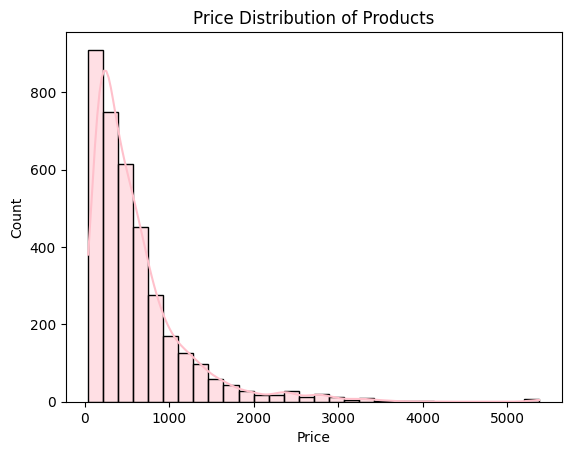

In [ ]:
sns.histplot(data['Price'], bins=30, kde=True,color= 'pink')
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.show()

**Price vs MRP**

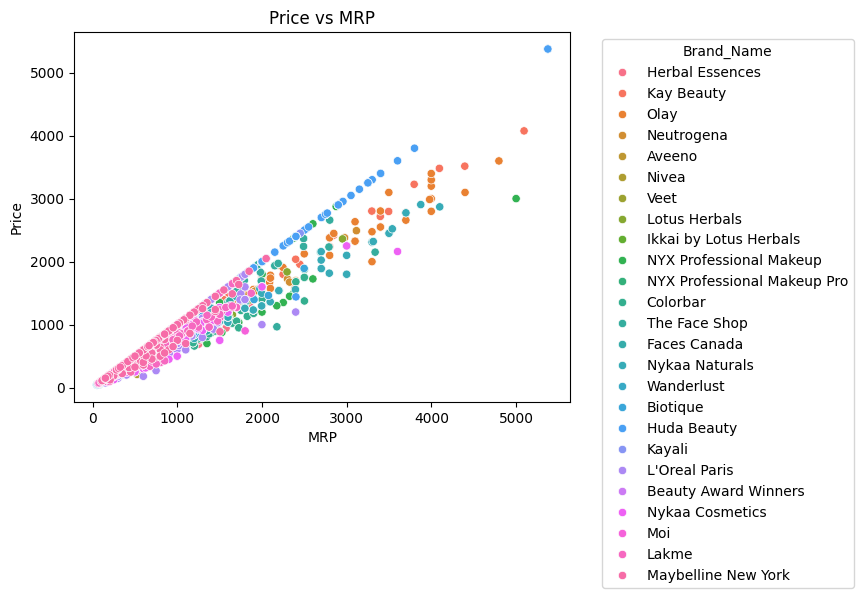

In [ ]:
sns.scatterplot(x='MRP', y='Price', data=data, hue='Brand_Name')
plt.title('Price vs MRP')
plt.legend(title='Brand_Name',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

**Discount calculation**

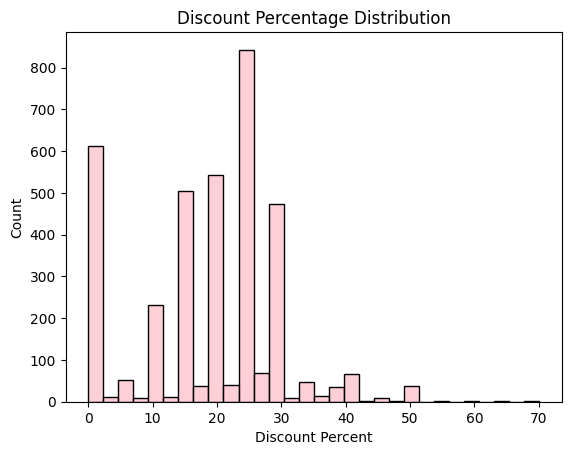

In [ ]:
data['discount_percent'] = ((data['MRP'] - data['Price']) / data['MRP']) * 100
sns.histplot(data['discount_percent'], bins=30,color='pink')
plt.title('Discount Percentage Distribution')
plt.xlabel('Discount Percent')
plt.show()


**5.RATING ANALYSIS**

**Rating Distribution**

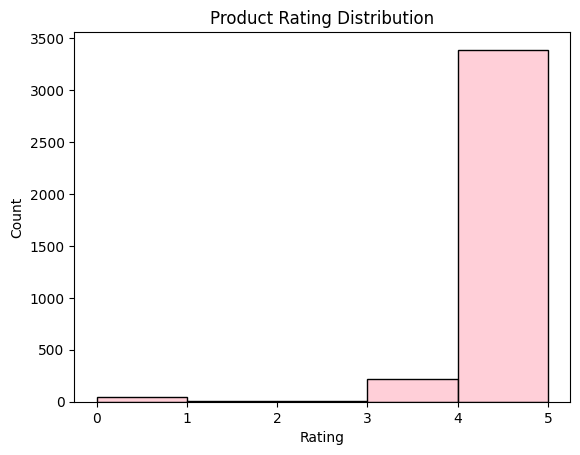

In [ ]:
sns.histplot(data['rating'], bins=5, kde=False,color='pink')
plt.title('Product Rating Distribution')
plt.xlabel('Rating')
plt.show()

**Rating vs Price**

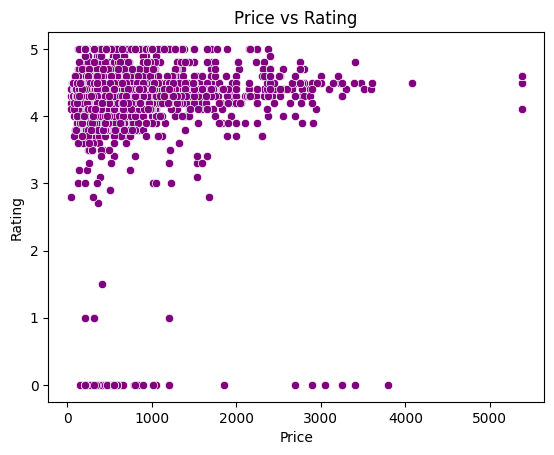

In [ ]:
sns.scatterplot(x='Price', y='rating', data=data,color='purple')
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

**Rating vs Rating Count**

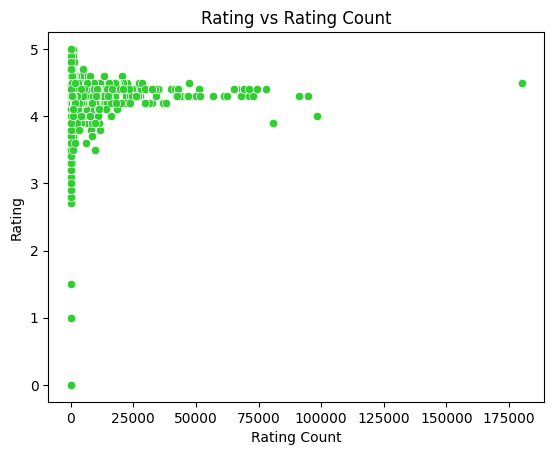

In [ ]:
sns.scatterplot(x='rating_count', y='rating', data=data,color='limegreen')
plt.title('Rating vs Rating Count')
plt.xlabel('Rating Count')
plt.ylabel('Rating')
plt.show()

**6.BRAND COMPARISON**

**Top 10 brands by number of products**

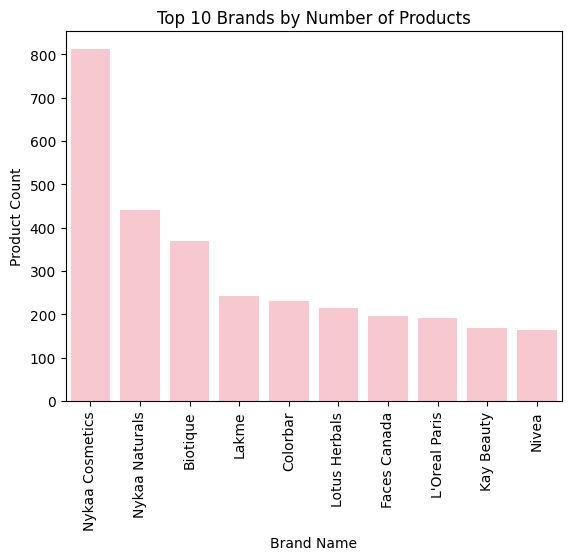

In [ ]:
top_brands = product_count.head(10)
sns.barplot(x='Brand_Name', y='product_count', data=top_brands, color='pink')
plt.title('Top 10 Brands by Number of Products')
plt.xlabel('Brand Name')
plt.ylabel('Product Count')
plt.xticks(rotation=90)
plt.show()


**Top 10 brands by average rating**

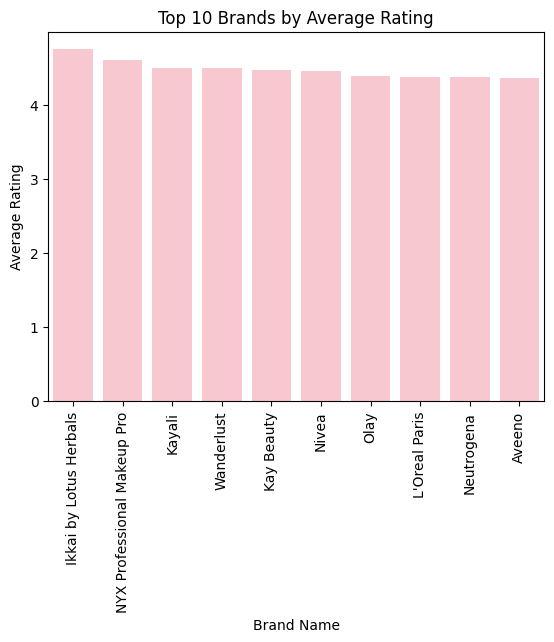

In [ ]:
top_brands_rating = brand_rating.sort_values(by='rating', ascending=False).head(10)
sns.barplot(x='Brand_Name', y='rating', data=top_brands_rating, color='pink')
plt.title('Top 10 Brands by Average Rating')
plt.xlabel('Brand Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

**7. CORRELATION ANALYSIS**

**Correlation between Brand,Rating and Discount**

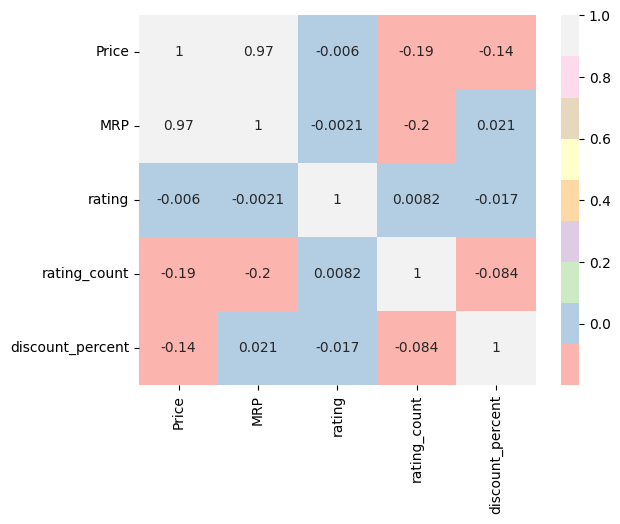

In [ ]:
sns.heatmap(data[['Price','MRP','rating','rating_count','discount_percent']].corr(), annot=True, cmap='Pastel1')
plt.show()


**8.DISCOUNT ANALYSIS**

**Top 10 Products with Highest Discounts**

In [ ]:
top_discount = data.sort_values(by='discount_percent', ascending=False).head(10)
print(top_discount[['Brand_Name','product_title','MRP','Price','discount_percent']])


           Brand_Name                                      product_title  \
2408    L'Oreal Paris  L'Oreal Paris Revitalift Crystal Gel Cream & C...   
2412    L'Oreal Paris  L'Oreal Paris Revitalift Crystal Micro Essence...   
527             Nivea  Nivea Waterlily & Oil Shower Gel & Naturally G...   
1068    The Face Shop              The Face Shop Summer Essentials Combo   
3303            Lakme                    Lakme Lip Love Gelato Chapstick   
3056  Nykaa Cosmetics  Nykaa Matte To Last Metallic Liquid Lipstick, ...   
3383            Lakme  Lakme Absolute Kohl Ultimate The Gelato Collec...   
3477            Lakme         Lakme Absolute Matte Melt Liquid Lip Color   
3489            Lakme                 Lakme Absolute Kohl Ultimate Kajal   
2946  Nykaa Cosmetics  Masaba's Favourite Look- Nail enamel- Femme Fa...   

       MRP  Price  discount_percent  
2408   598    179         70.066890  
2412   748    269         64.037433  
527    524    210         59.923664  
1068  2175 

In [ ]:
top_discount

,Brand_Name,Product_ID,in_stock,MRP,Price,product_title,rating,rating_count,tags,listing_page_name,discount_percent
2408,L'Oreal Paris,7823298,False,598,179,L'Oreal Paris Revitalift Crystal Gel Cream & C...,4.4,38,NaN,L'Oreal Paris,70.066890
2412,L'Oreal Paris,7823295,False,748,269,L'Oreal Paris Revitalift Crystal Micro Essence...,4.4,914,NaN,L'Oreal Paris,64.037433
527,Nivea,6737911,False,524,210,Nivea Waterlily & Oil Shower Gel & Naturally G...,4.4,2318,NaN,Nivea Products Online,59.923664
1068,The Face Shop,5403094,True,2175,965,The Face Shop Summer Essentials Combo,4.6,6496,NaN,The Face Shop,55.632184
3303,Lakme,888639,True,199,98,Lakme Lip Love Gelato Chapstick,4.3,2555,NaN,Lakme,50.753769
3056,Nykaa Cosmetics,1181765,True,1500,750,"Nykaa Matte To Last Metallic Liquid Lipstick, ...",4.2,6267,NaN,Nykaa Cosmetics Products Collection,50.000000
3383,Lakme,684657,True,800,400,Lakme Absolute Kohl Ultimate The Gelato Collec...,4.1,1654,NaN,Lakme,50.000000
3477,Lakme,328497,False,750,375,Lakme Absolute Matte Melt Liquid Lip Color,4.2,23837,NaN,Lakme,50.000000
3489,Lakme,294157,True,850,425,Lakme Absolute Kohl Ultimate Kajal,4.2,1742,NaN,Lakme,50.000000
2946,Nykaa Cosmetics,3756793,True,998,499,Masaba's Favourite Look- Nail enamel- Femme Fa...,4.5,2,NaN,Nykaa Cosmetics Products Collection,50.000000


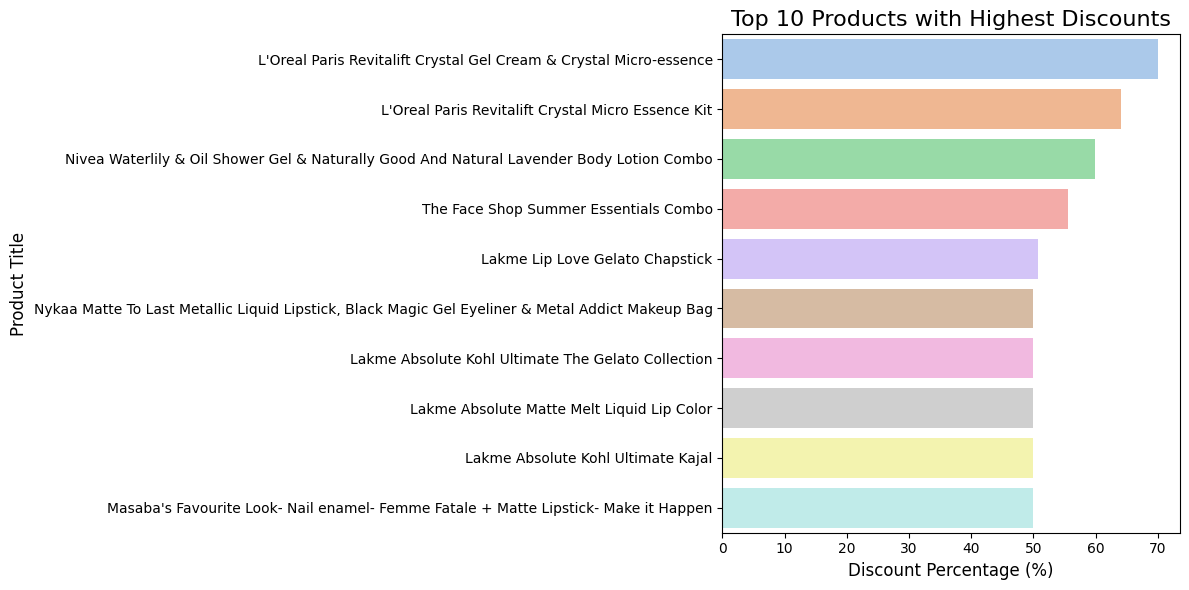

In [ ]:
plt.figure(figsize=[12,6])
sns.barplot(
    x='discount_percent',
    y='product_title',
    data=top_discount,
    palette='pastel'
)

plt.title('Top 10 Products with Highest Discounts', fontsize=16)
plt.xlabel('Discount Percentage (%)', fontsize=12)
plt.ylabel('Product Title', fontsize=12)
plt.tight_layout()
plt.show()
